In [1]:
# Demo of using Value
from nn_engine.value import Value

In [2]:
def f(x):
    return x ** 2 + 2 * x + 1

# Initialize x with value 3.0 and derivative 1.0
x = Value(3.0)

# Compute f(x)
y = f(x)
y.backward()
print(y)  # Output: Value(value=16.0, derivative=1.0)
print(x) # Output: Value(value=3.0, derivative=8.0)

Value(data=16.0, grad=1.0)
Value(data=3.0, grad=8.0)


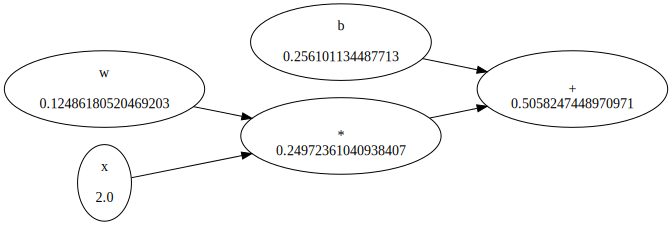

In [3]:
import random
# Define a simple linear model: y = w * x + b
def model(w, b, x):
    return w * x + b

# Define a mean squared error loss function
def loss(y_pred, y_true):
    return (y_pred - y_true) ** 2

# Initialize parameters
w = Value(random.random(), label="w")
b = Value(random.random(), label="b")

# Sample data
x = Value(2.0, label="x")
y_true = 4.0

# Forward pass
y_pred = model(w, b, x)
y_pred._label = "y_pred"
y_pred.graph()

In [4]:
current_loss = loss(y_pred, y_true)
# Backward pass
current_loss.backward()
print(current_loss)
# Update parameters (gradient descent step)
learning_rate = 0.01
w = w - learning_rate * w.grad
b = b - learning_rate * b.grad
for i in range(100):
    y_pred = model(w, b, x)
    current_loss = loss(y_pred, y_true)
    current_loss.backward()

    w = w - learning_rate * w.grad
    b = b - learning_rate * b.grad
print(current_loss.data)

Value(data=12.209260713373437, grad=1.0)
8.613730018911154e-09


In [5]:
print(model(w, b, x))

Value(data=3.99991647083554, grad=0)
